In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/kalimati-tarkari-prices-from-may-2021-to-september-2023.csv')

In [ ]:
df.head()

,Commodity,Date,Unit,mimimum,maximum,Average
0,Tomato Big(Nepali),1/5/2021,Kg,50,60,55
1,Tomato Big(Indian),1/5/2021,Kg,50,60,55
2,Tomato Small(Local),1/5/2021,Kg,30,35,32.5
3,Tomato Small(Tunnel),1/5/2021,Kg,30,35,32.5
4,Tomato Small(Indian),1/5/2021,KG,40,45,42.5


In [ ]:
df.tail()

,Commodity,Date,Unit,mimimum,maximum,Average
96475,Tomato Small(Indian),9/28/2023,KG,Rs 45.00,Rs 55.00,Rs 50.00
96476,Tomato Small(Local),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 55.00
96477,Tomato Small(Tunnel),9/28/2023,KG,Rs 60.00,Rs 75.00,Rs 69.00
96478,Turnip A,9/28/2023,KG,Rs 70.00,Rs 80.00,Rs 75.00
96479,Water Melon(Green),9/28/2023,KG,Rs 50.00,Rs 60.00,Rs 56.67


In [ ]:
print(df.describe())

          Commodity       Date   Unit   mimimum maximum Average
count         96480      96480  96480     96480   96480   96480
unique          133        991      6       268     276    1093
top     Cauli Local  3/14/2023     KG  Rs 50.00      60      55
freq            991        115  55421      4364    4272    4152


In [ ]:
df.describe()

,Date,mimimum,maximum,Average,Year,Month,Day
count,96480,96480.000000,96480.000000,96480.000000,96480.000000,96480.000000,96480.000000
mean,2022-05-21 03:47:09.850746368,118.575020,135.156965,127.233227,2021.925601,6.041978,15.775612
min,2021-01-05 00:00:00,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000
25%,2021-09-22 00:00:00,50.000000,60.000000,55.000000,2021.000000,3.000000,8.000000
50%,2022-05-19 00:00:00,80.000000,90.000000,85.000000,2022.000000,6.000000,16.000000
75%,2023-01-28 00:00:00,150.000000,180.000000,165.000000,2023.000000,9.000000,23.000000
max,2023-09-28 00:00:00,2800.000000,3000.000000,2900.000000,2023.000000,12.000000,31.000000
std,NaN,114.150942,128.223495,121.358850,0.794249,3.374263,8.742770


In [ ]:
# Clean numeric columns
df['mimimum'] = df['mimimum'].astype(str).str.replace('Rs ', '', regex=False).astype(float)
df['maximum'] = df['maximum'].astype(str).str.replace('Rs ', '', regex=False).astype(float)
df['Average'] = df['Average'].astype(str).str.replace('Rs ', '', regex=False).astype(float)

In [ ]:
df.head

In [ ]:
# Convert Date and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.head()

,Commodity,Date,Unit,mimimum,maximum,Average,Year,Month,Day
0,Tomato Big(Nepali),2021-01-05,Kg,50.0,60.0,55.0,2021,1,5
1,Tomato Big(Indian),2021-01-05,Kg,50.0,60.0,55.0,2021,1,5
2,Tomato Small(Local),2021-01-05,Kg,30.0,35.0,32.5,2021,1,5
3,Tomato Small(Tunnel),2021-01-05,Kg,30.0,35.0,32.5,2021,1,5
4,Tomato Small(Indian),2021-01-05,KG,40.0,45.0,42.5,2021,1,5


In [ ]:
# Select numeric features
features = ['mimimum', 'Average', 'Year', 'Month', 'Day']
X = df[features]
y = df['maximum']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso
# Lasso regression
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
# Predictions
y_pred = lasso.predict(X_test_scaled)


In [ ]:
print(y_pred)

[ 80.78810144  49.5511902  132.84962017 ... 340.05446473  59.96349395
 164.08653141]


Mean Absolute Error: 3.4462031676970377
R2 Score: 0.9865264862030112


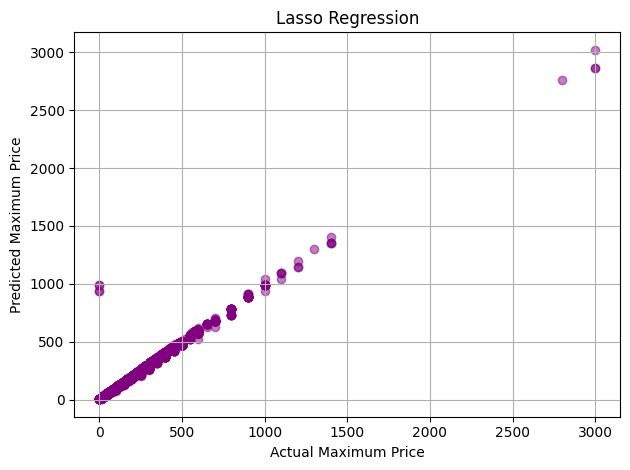

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R2 Score:", score)
# Plot
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.xlabel("Actual Maximum Price")
plt.ylabel("Predicted Maximum Price")
plt.title("Lasso Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV
# LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
# Predict
y_pred_lasso = lassocv.predict(X_test_scaled)
print(y_pred_lasso)

[ 80.50978942  48.87440872 132.93150676 ... 341.56994179  59.44992734
 164.20218688]


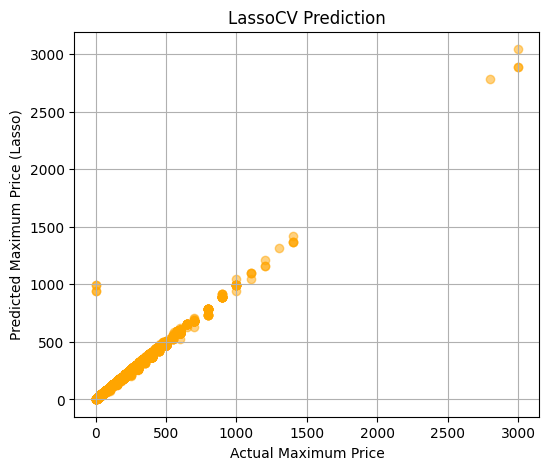

🔍 LassoCV Results:
Mean Absolute Error: 3.3521932350578356
R² Score: 0.9865721643576311


In [ ]:
# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5)
plt.xlabel("Actual Maximum Price")
plt.ylabel("Predicted Maximum Price (Lasso)")
plt.title("LassoCV Prediction")
plt.grid(True)
plt.show()

# Metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("🔍 LassoCV Results:")
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

**Ridge Regression**

Mean absolute error 2.1465550369791297
R2 Score 0.9875300028555216


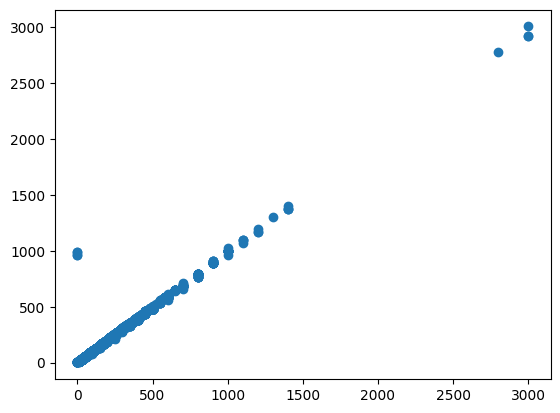

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)


Mean absolute error 2.2851292758864137
R2 Score 0.9874528828065547


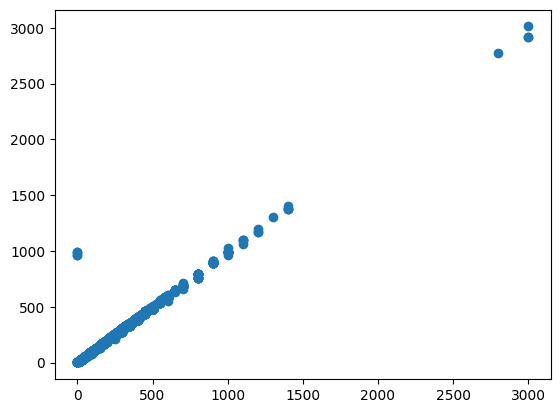

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)


In [ ]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

**ElasticNet Regression**

Mean absolute error 19.07791097933999
R2 Score 0.9442873202128754


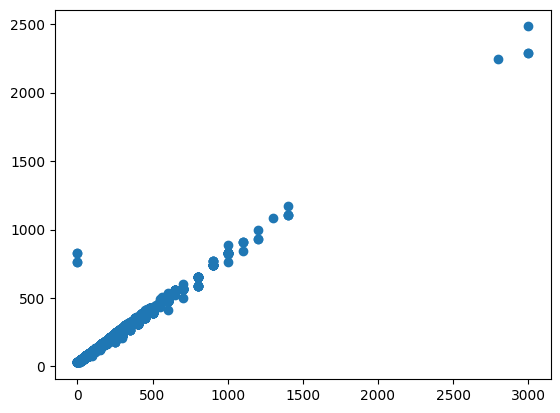

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(y_test, y_pred)


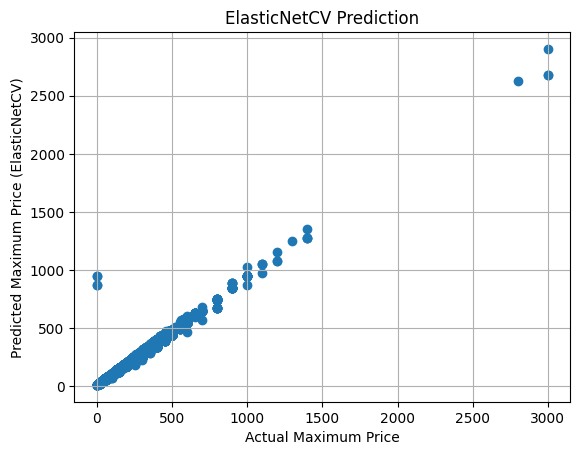

Mean absolute error 7.41821622670216
R2 Score 0.9810572813778082


In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Maximum Price")
plt.ylabel("Predicted Maximum Price (ElasticNetCV)")
plt.title("ElasticNetCV Prediction")
plt.grid(True)
plt.show()

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)


In [ ]:
https://github.com/krishnaik06/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/blob/main/4-Ridge%20Lasso%20And%20Elasticnet/Ridge%20Lassso%20Elastic%20Regression%20Practicals/Model%20Training.ipynb